In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
import gc
import io
import os
import math
from itertools import combinations

from IPython.display import display
pd.set_option('display.max_columns', 99)
pd.set_option('display.max_rows', 200)

pd.reset_option('display.float_format')
pd.set_option('display.max_colwidth', None)  

from sitecustomize import ROOT # lib này được khởi tạo ban đầu dự án

import helpers.view as view
import helpers.EDA as EDA

importlib.reload(view)
importlib.reload(EDA)

<module 'helpers.EDA' from 'd:\\DataMiningBTL\\helpers\\EDA.py'>

In [4]:
def cache_clear():
    for var in list(globals()):  
        if var not in _keep_vars and not var.startswith("_"):  
            del globals()[var]  

    gc.collect()
_keep_vars = set(globals().keys())  # lưu biến gốc

# get data

In [5]:
df = pd.read_csv(ROOT + "/data/bank/bank-full.csv", sep=';')

In [19]:
test = pd.read_csv(ROOT + "/data/bank/bank.csv", sep=';') # là 10% bộ dữ liệu ban đầu coi như là test

In [7]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [9]:
#    1 - age (numeric)
#    2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
#                                        "blue-collar","self-employed","retired","technician","services") 
#    3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
#    4 - education (categorical: "unknown","secondary","primary","tertiary")
#    5 - default: has credit in default? (binary: "yes","no")
#    6 - balance: average yearly balance, in euros (numeric) 
#    7 - housing: has housing loan? (binary: "yes","no")
#    8 - loan: has personal loan? (binary: "yes","no")
#    # related with the last contact of the current campaign:
#    9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
#   10 - day: last contact day of the month (numeric)
#   11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
#   12 - duration: last contact duration, in seconds (numeric)
#    # other attributes:
#   13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
#   14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
#   15 - previous: number of contacts performed before this campaign and for this client (numeric)
#   16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

#   Output variable (desired target):
#   17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [32]:
description = pd.DataFrame({
    "Row": [
        "age", "job", "marital", "education", "default", "balance", "housing", "loan",
        "contact", "day", "month", "duration", "campaign", "pdays", "previous", "poutcome",
        "y"
    ],
    "Description": [
        "Tuổi của khách hàng (số)",
        "Nghề nghiệp (danh mục)",
        "Tình trạng hôn nhân (danh mục)",
        "Trình độ học vấn (danh mục)",
        "Khách hàng có nợ xấu không? (yes/no)",
        "Số dư trung bình hàng năm (euro)",
        "Khách hàng có vay mua nhà không? (yes/no)",
        "Khách hàng có vay tiêu dùng không? (yes/no)",
        "Loại phương thức liên hệ (unknown/telephone/cellular)",
        "Ngày gọi gần nhất trong tháng (số)",
        "Tháng gọi (danh mục: jan, feb, ...)",
        "Thời lượng cuộc gọi (giây)",
        "Số lần liên hệ trong chiến dịch hiện tại (bao gồm cả lần này)",
        "Số ngày kể từ lần gọi trước trong chiến dịch trước (-1 nếu chưa gọi)",
        "Số lần liên hệ trước đó trong các chiến dịch khác",
        "Kết quả của chiến dịch trước (unknown/other/failure/success)",
        "Khách hàng có đăng ký gửi tiết kiệm không? (yes/no)"
    ]
})


In [35]:
df_info = EDA.df_info(df).reset_index()
df_merged = pd.merge(df_info, description, 
                     left_on="index", right_on="Row", how="left").drop(columns=["Row"])
df_merged

Shape: (45211, 17)


,index,DataType,#Nulls,#Uniques,Min,Mean,Std,Max,top10 val,top10 cnt,top10 ratio,Description
0,age,int64,0,77,18.0,40.936210,10.618762,95.0,"32, 31, 33, 34, 35, 36, 30, 37, 39, 38","2085, 1996, 1972, 1930, 1894, 1806, 1757, 1696, 1487, 1466","0.046, 0.044, 0.044, 0.043, 0.042, 0.04, 0.039, 0.038, 0.033, 0.032",Tuổi của khách hàng (số)
1,job,object,0,12,NaN,NaN,NaN,NaN,"blue-collar, management, technician, admin., services, retired, self-employed, entrepreneur, unemployed, housemaid","9732, 9458, 7597, 5171, 4154, 2264, 1579, 1487, 1303, 1240","0.215, 0.209, 0.168, 0.114, 0.092, 0.05, 0.035, 0.033, 0.029, 0.027",Nghề nghiệp (danh mục)
2,marital,object,0,3,NaN,NaN,NaN,NaN,"married, single, divorced","27214, 12790, 5207","0.602, 0.283, 0.115",Tình trạng hôn nhân (danh mục)
3,education,object,0,4,NaN,NaN,NaN,NaN,"secondary, tertiary, primary, unknown","23202, 13301, 6851, 1857","0.513, 0.294, 0.152, 0.041",Trình độ học vấn (danh mục)
4,default,object,0,2,NaN,NaN,NaN,NaN,"no, yes","44396, 815","0.982, 0.018",Khách hàng có nợ xấu không? (yes/no)
5,balance,int64,0,7168,-8019.0,1362.272058,3044.765829,102127.0,"0, 1, 2, 4, 3, 5, 6, 8, 23, 7","3514, 195, 156, 139, 134, 113, 88, 81, 75, 69","0.078, 0.004, 0.003, 0.003, 0.003, 0.002, 0.002, 0.002, 0.002, 0.002",Số dư trung bình hàng năm (euro)
6,housing,object,0,2,NaN,NaN,NaN,NaN,"yes, no","25130, 20081","0.556, 0.444",Khách hàng có vay mua nhà không? (yes/no)
7,loan,object,0,2,NaN,NaN,NaN,NaN,"no, yes","37967, 7244","0.84, 0.16",Khách hàng có vay tiêu dùng không? (yes/no)
8,contact,object,0,3,NaN,NaN,NaN,NaN,"cellular, unknown, telephone","29285, 13020, 2906","0.648, 0.288, 0.064",Loại phương thức liên hệ (unknown/telephone/cellular)
9,day,int64,0,31,1.0,15.806419,8.322476,31.0,"20, 18, 21, 17, 6, 5, 14, 8, 28, 7","2752, 2308, 2026, 1939, 1932, 1910, 1848, 1842, 1830, 1817","0.061, 0.051, 0.045, 0.043, 0.043, 0.042, 0.041, 0.041, 0.04, 0.04",Ngày gọi gần nhất trong tháng (số)


In [12]:
# obj_features = [c for c in df.columns if (df[c].dtype=='O') | (df[c].nunique() <= 7)]

In [16]:
# con_features = [c for c in df.columns if (df[c].dtype!='O') & (c not in obj_features)]

In [25]:
obj_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day', 'month', 'poutcome', 'y']
con_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

## category

In [40]:
obj_description = [description[description["Row"] == c]["Description"].values[0] for c in obj_features]


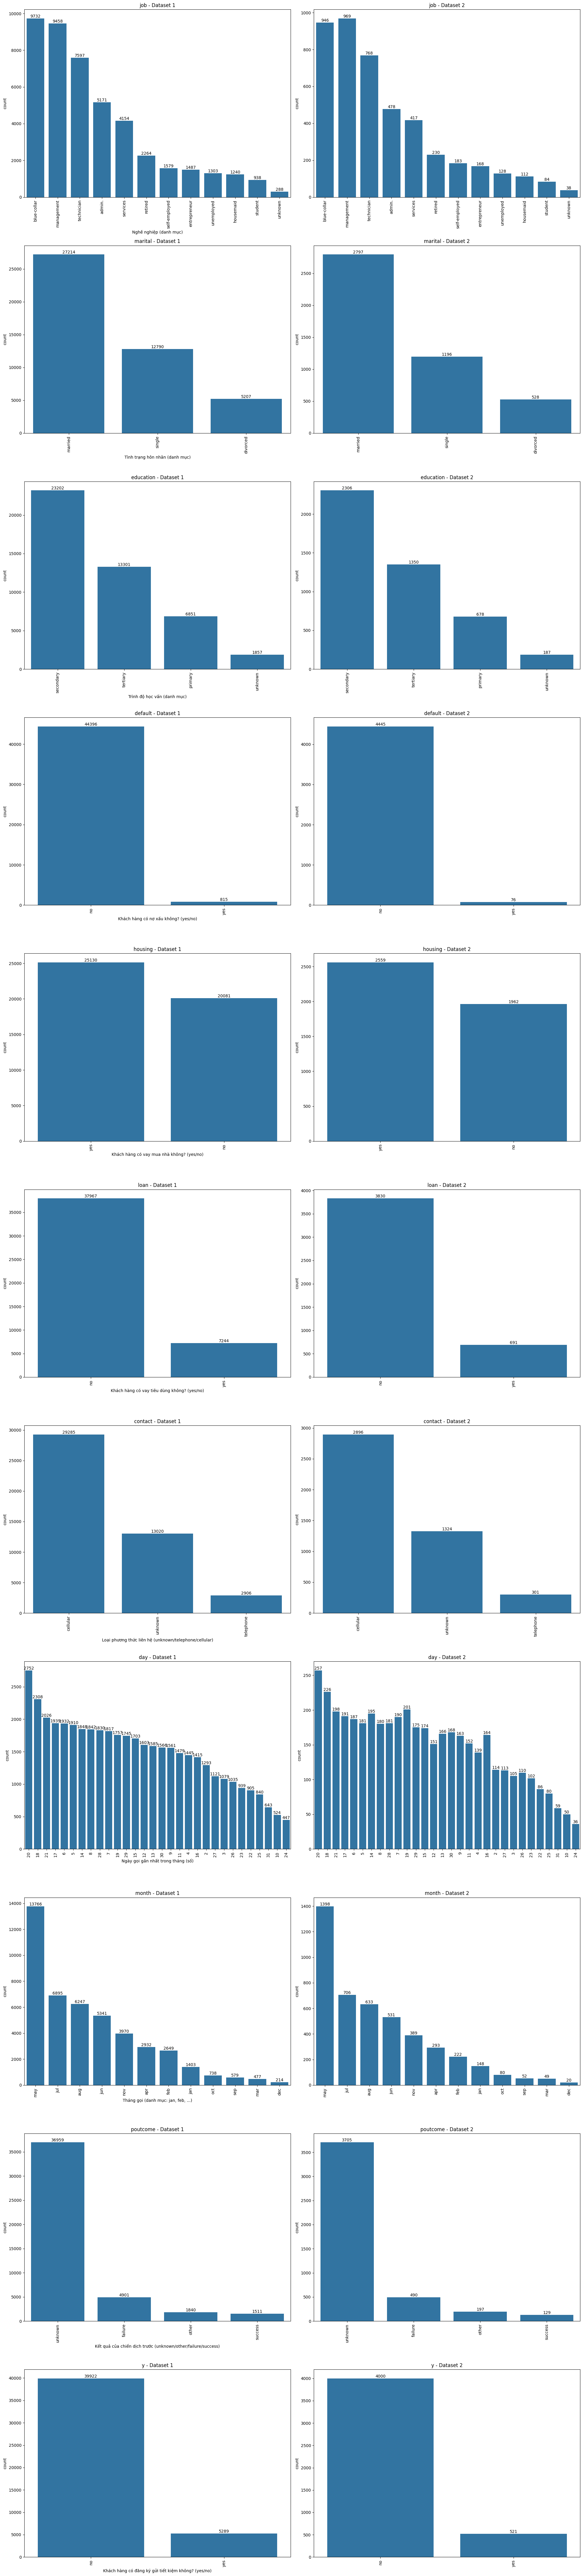

In [42]:
view.html_view_image(EDA.count_categories(df, obj_features, df2=test, description=obj_description))

* số nhãn không quá nhiều, có thể sử dụng hot one code để tăng độ ảnh hưởng giữa các nhãn
* ngoài ra cũng thử label encode và target encode (tránh data leakage)
* sử dụng kfold để validate tránh overfit
* có sự chênh lệch đáng kể giữa những vùng dữ liệu
* poutcome (kết quả chiến lược) có thể là feature quan trọng

## cont

In [47]:
con_description = [description[description["Row"] == c]["Description"].values[0] for c in con_features]


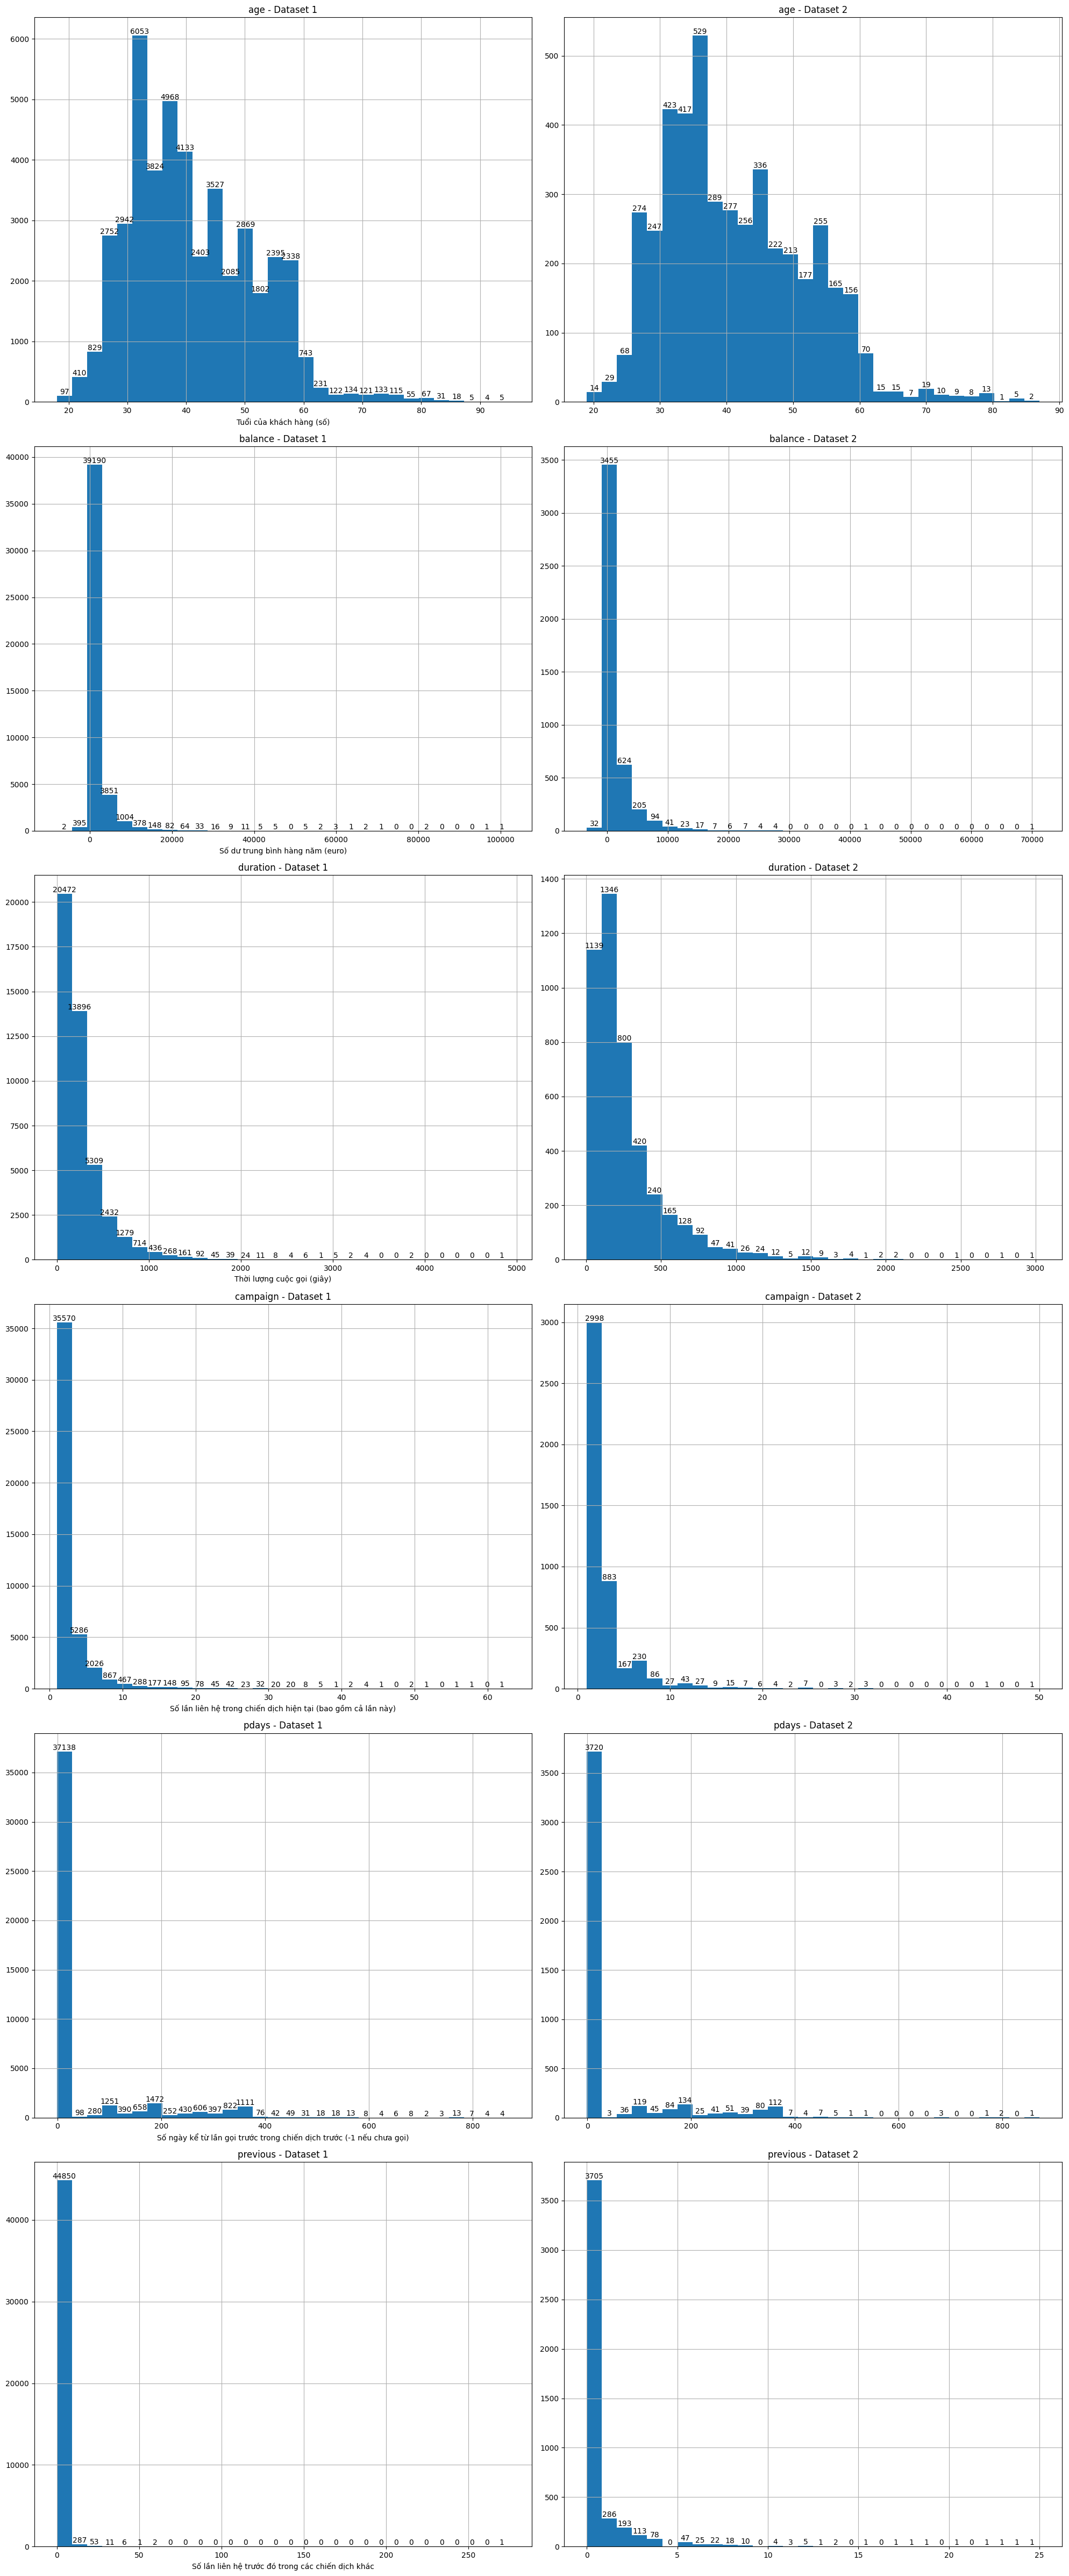

In [48]:
view.html_view_image(EDA.hist_continuous(df, df2=test, continuous_features=con_features, description=con_description))

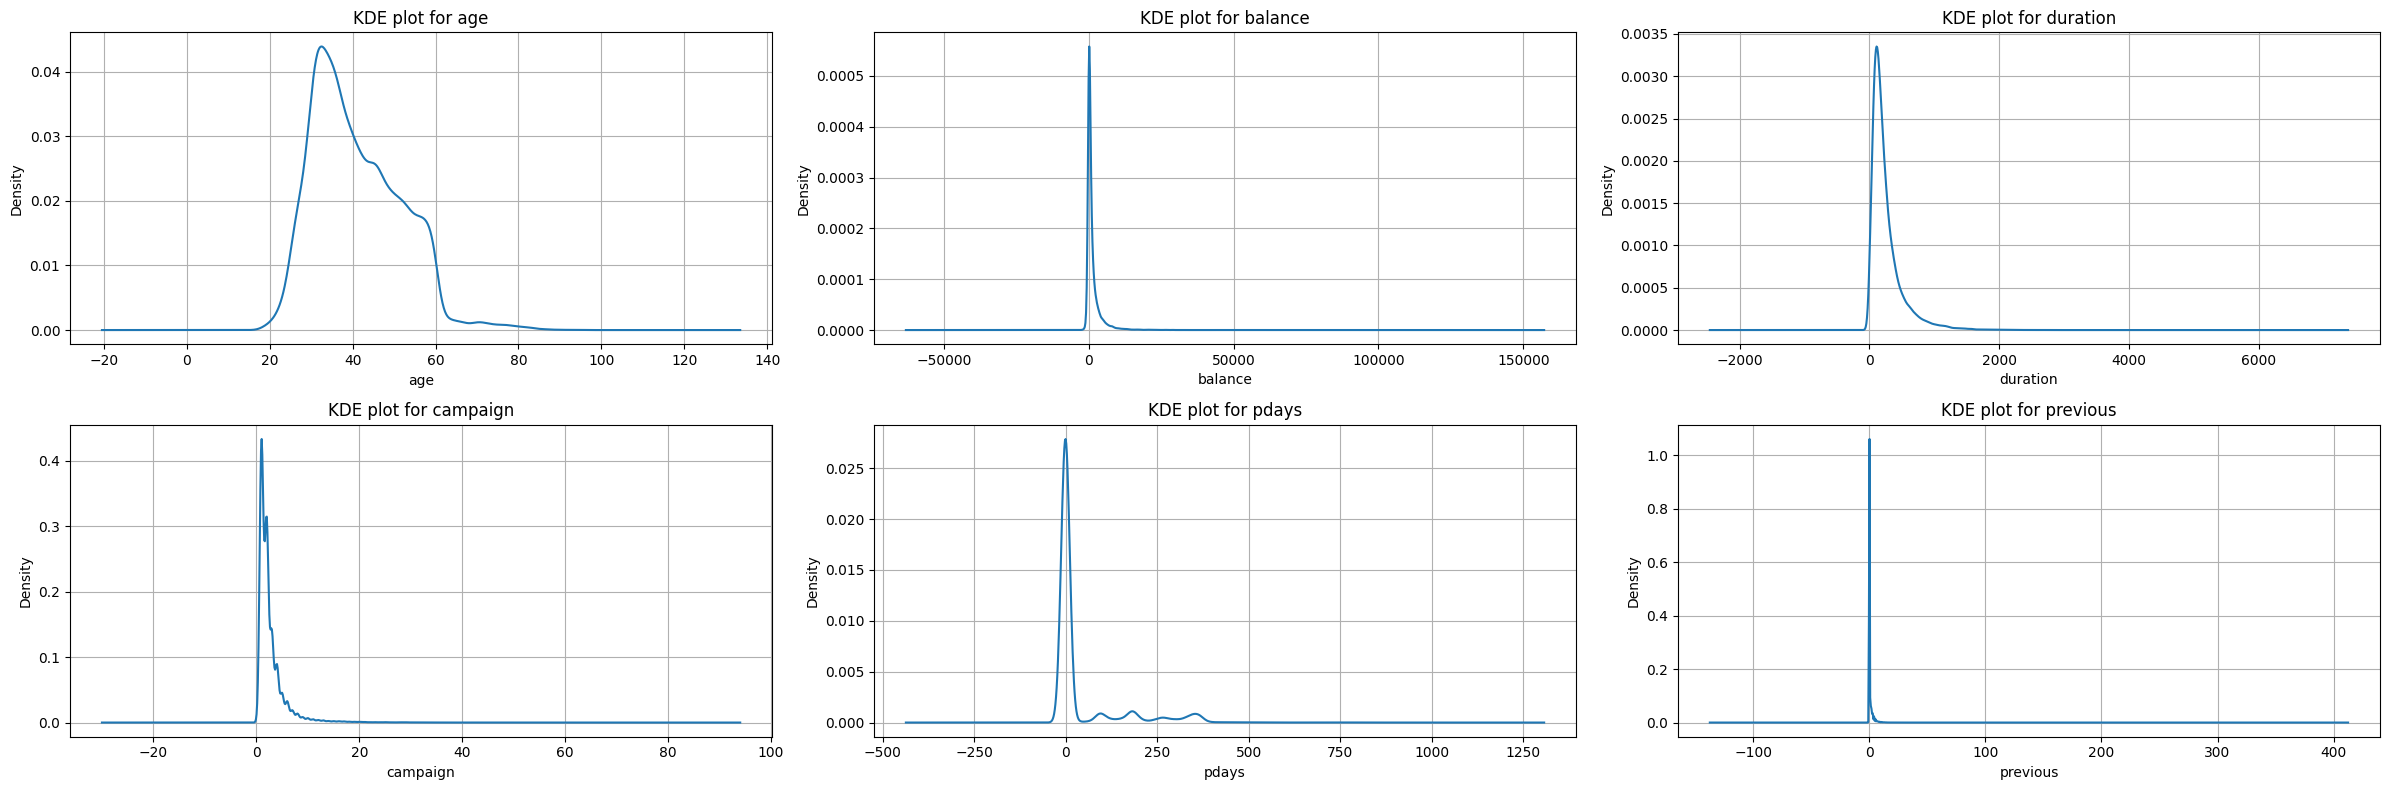

In [57]:
n = len(con_features)
cols = 3 
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 8, rows * 4))
axes = axes.flatten()

for i, c in enumerate(con_features):
    df[c].plot(kind='kde', ax=axes[i])
    axes[i].set_title(f'KDE plot for {c}')
    axes[i].set_xlabel(c)
    axes[i].grid(True)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

* phân phối chuẩn


# corr

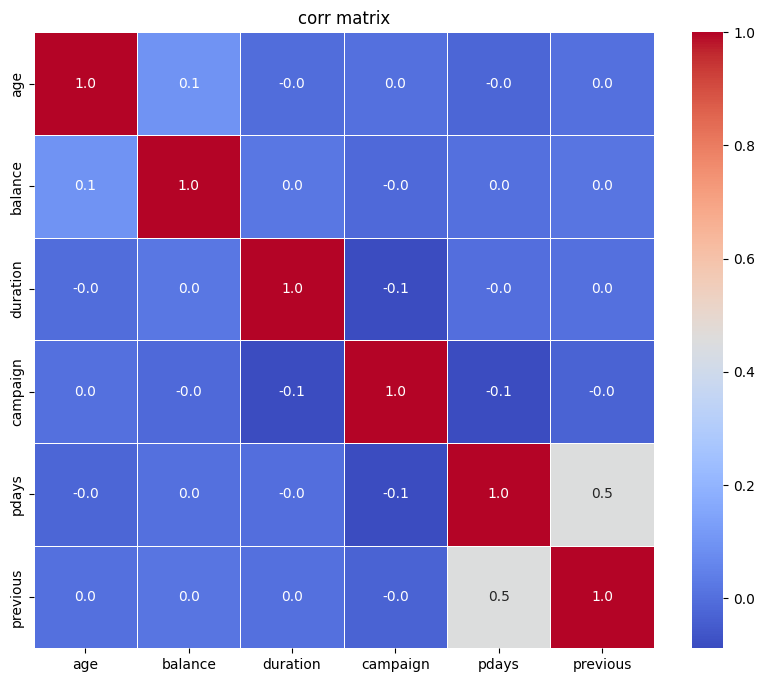

In [58]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[con_features].corr(), annot=True, fmt=".1f", cmap="coolwarm", linewidths=0.5)
plt.title("corr matrix")
plt.show()

In [59]:
cache_clear()